# House Prices - Preprocessing
Here I describe my approach to clean, transform and prepare the data of the House Prices competition at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

In [3]:
np.random.seed(42)

## Loading the data

In [4]:
df_train = pd.read_csv('../datasets/train.csv', index_col=0)
df_test = pd.read_csv('../datasets/test.csv', index_col=0)

In [5]:
df = pd.concat([df_train, df_test], axis=0, join='outer')

In [6]:
df.shape

(2919, 80)

In [7]:
df = df.reindex_axis(sorted(df.columns), axis=1)

In [8]:
df = df.drop('SalePrice', axis=1)
df.insert(len(df.columns), 'SalePrice', df_train['SalePrice'])

In [9]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,208500.0
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,181500.0
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,223500.0
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,140000.0
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,250000.0


In [10]:
df.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2915,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,0,Pave,5,546.0,AllPub,0,1970,1970,2006,NaN
2916,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,0,Pave,6,546.0,AllPub,0,1970,1970,2006,NaN
2917,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,0,Pave,7,1224.0,AllPub,474,1960,1996,2006,NaN
2918,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,0,Pave,6,912.0,AllPub,80,1992,1992,2006,NaN
2919,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,...,0,Pave,9,996.0,AllPub,190,1993,1994,2006,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [12]:
nominal_variables = [
    'Alley',
    'BldgType',
    'CentralAir',
    'Condition1',
    'Condition2',
    'Exterior1st',
    'Exterior2nd',
    'Foundation',
    'GarageType',
    'Heating',
    'HouseStyle',
    'LandContour',
    'LotConfig',
    'MasVnrType',
    'MiscFeature',
    'MSSubClass',
    'MSZoning',
    'Neighborhood',
    'RoofMatl',
    'RoofStyle',
    'SaleType',
    'SaleCondition',
    'Street',
]

In [13]:
ordinal_variables = [
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtQual',
    'Electrical',
    'ExterCond',
    'ExterQual',
    'Fence',
    'FireplaceQu',
    'Functional',
    'GarageCond',
    'GarageFinish',
    'GarageQual',
    'HeatingQC',
    'KitchenQual',
    'LandSlope',
    'LotShape',
    'OverallCond',
    'OverallQual',
    'PavedDrive',
    'PoolQC',    
    'Utilities',
]

In [14]:
discrete_variables = [
    'BedroomAbvGr',
    'BsmtFullBath',
    'BsmtHalfBath',
    'Fireplaces',
    'FullBath',
    'GarageYrBlt',
    'GarageCars',
    'HalfBath',
    'KitchenAbvGr',
    'MoSold',
    'TotRmsAbvGrd',    
    'YearBuilt',
    'YearRemodAdd',
    'YrSold',
]

In [15]:
continuous_variables = [
    '1stFlrSF',
    '2ndFlrSF',
    '3SsnPorch',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'EnclosedPorch',
    'GarageArea',
    'GrLivArea',
    'LotArea',
    'LotFrontage',
    'LowQualFinSF',
    'MasVnrArea',
    'MiscVal',
    'OpenPorchSF',
    'PoolArea',
    'ScreenPorch',
    'TotalBsmtSF',
    'WoodDeckSF',
    'SalePrice',
]

The training set contains 1460 samples, with 80 features each (79 + target variable `SalePrice`). Among these features, 23 are nominal, 23 are ordinal, 14 are discrete and 20 are continuous variables. The test set contains 1459 samples.

The training and test data sets were joined together to form a complete data set with 2919 samples and 80 features (where `SalePrice == NaN` for all test samples). So we can do feature engineering for both at the same time.

In [16]:
df_copy1 = df.copy()

## Fixing data representation

In [17]:
from functools import reduce

In [18]:
df[continuous_variables] = df[continuous_variables].astype(float)

In [19]:
mssubclass_values = df['MSSubClass'].unique().tolist()
df['MSSubClass'] = df['MSSubClass'].map({x:str(x).zfill(3) for x in mssubclass_values})
df['MSSubClass'].unique()

array(['060', '020', '070', '050', '190', '045', '090', '120', '030',
       '085', '080', '160', '075', '180', '040', '150'], dtype=object)

In [20]:
missing = df.apply(lambda x: x.isnull().sum(), axis=0)
missing[missing > 0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
SalePrice       1459
dtype: int64

#### Basement related features

In [21]:
columns_na = [
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtQual',
]
columns_na_or_zero = [
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'BsmtUnfSF',
    'TotalBsmtSF',
]
idx = df[columns_na].apply(lambda x: reduce(np.logical_and, x.isnull()), axis=1, reduce=True) & \
      df[columns_na_or_zero].apply(lambda x: reduce(np.logical_and, x.isnull() | (x == 0)), axis=1, reduce=True)

In [22]:
df.loc[idx, columns_na] = 'NA'
df.loc[idx, columns_na_or_zero] = 0

In [23]:
df.loc[idx, columns_na + columns_na_or_zero].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,,
18,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Masonry veneer related features

In [24]:
idx = df['MasVnrType'].isnull() & (df['MasVnrArea'].isnull() | (df['MasVnrArea'] == 0))

In [25]:
df.loc[idx, 'MasVnrType'] = 'None'
df.loc[idx, 'MasVnrArea'] = 0

In [26]:
df.loc[idx, ['MasVnrType', 'MasVnrArea']].head()

,MasVnrType,MasVnrArea
Id,,
235,None,0.0
530,None,0.0
651,None,0.0
937,None,0.0
974,None,0.0


#### Misc related features

In [27]:
idx1 = df['MiscFeature'].isnull() & (df['MiscVal'] == 0)
idx2 = df['MiscFeature'].isnull() & (df['MiscVal'] != 0)

In [28]:
df.loc[idx1, 'MiscFeature'] = 'NA'
df.loc[idx2, 'MiscVal'] = 0

In [29]:
df.loc[idx1 | idx2, ['MiscFeature', 'MiscVal']].head()

,MiscFeature,MiscVal
Id,,
1,NA,0.0
2,NA,0.0
3,NA,0.0
4,NA,0.0
5,NA,0.0


#### Pool related features

In [30]:
idx = (df['PoolArea'].isnull() | (df['PoolArea'] == 0)) & df['PoolQC'].isnull()

In [31]:
df.loc[idx, ['PoolArea']] = 0
df.loc[idx, ['PoolQC']] = 'NA'

In [32]:
df.loc[idx, ['PoolArea', 'PoolQC']].head()

,PoolArea,PoolQC
Id,,
1,0.0,NA
2,0.0,NA
3,0.0,NA
4,0.0,NA
5,0.0,NA


#### Garage related features

In [33]:
columns_na = [
    'GarageCond',
    'GarageFinish',
    'GarageQual',
    'GarageType',
    'GarageYrBlt',
]
columns_na_or_zero = [
    'GarageArea',
    'GarageCars',
]
columns_na.remove('GarageYrBlt')
idx = df[columns_na].apply(lambda x: reduce(np.logical_and, x.isnull()), axis=1, reduce=True) & \
      df[columns_na_or_zero].apply(lambda x: reduce(np.logical_and, x.isnull() | (x == 0)), axis=1, reduce=True)

In [34]:
df.loc[idx, columns_na] = 'NA'
df.loc[idx, columns_na_or_zero] = 0

In [35]:
df.loc[idx, 'GarageYrBlt'] = df.loc[idx, 'GarageYrBlt'].replace('NA', np.nan)

In [36]:
df.loc[idx, columns_na + columns_na_or_zero + ['GarageYrBlt']].head()

,GarageCond,GarageFinish,GarageQual,GarageType,GarageArea,GarageCars,GarageYrBlt
Id,,,,,,,
40,NA,NA,NA,NA,0.0,0.0,NaN
49,NA,NA,NA,NA,0.0,0.0,NaN
79,NA,NA,NA,NA,0.0,0.0,NaN
89,NA,NA,NA,NA,0.0,0.0,NaN
90,NA,NA,NA,NA,0.0,0.0,NaN


#### Features with only false `NA`s

In [37]:
columns_with_false_na = [
    'Alley',
    'Fence',
    'FireplaceQu',
]
df[columns_with_false_na] = df[columns_with_false_na].fillna('NA')

In [38]:
missing = df.apply(lambda x: x.isnull().sum(), axis=0)
missing[missing > 0]

BsmtCond           3
BsmtExposure       3
BsmtFinType2       1
BsmtQual           2
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageCond         2
GarageFinish       2
GarageQual         2
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrType         1
MiscFeature        1
PoolQC             3
SaleType           1
Utilities          2
SalePrice       1459
dtype: int64

By default, Pandas interprets unquoted `"NA"` strings in CSV files as missing values (`numpy.NaN`, aka `NA`). We could have avoided this if all `"NA"` strings were actually `NA`, but there are some features in which an `"NA"` string can be a valid, literal value for that feature. Thus, it was necessary to identify and get rid of the false `NA`s. To make things more difficult, some features had both literal `"NA"` and `NA`, and the only way to distinguish one from another was to check other features in order to look for inconsistencies.

In addition, `MSSubClass` is a nominal variable, but its values were read as integers, so they had be mapped back to strings. And the continuous numeric variables were all cast to float.

In [39]:
df_copy2 = df.copy()

## Imputation of missing values

In [40]:
columns_with_na = missing[missing > 0].index.tolist()
columns_to_ignore = ['GarageYrBlt', 'LotFrontage', 'SalePrice']

In [41]:
columns_fill_w_mean = [
    x for x in columns_with_na if x in continuous_variables and x not in columns_to_ignore
]
for x in columns_fill_w_mean:
    df[x] = df[x].fillna(df[x].mean())

In [42]:
columns_fill_w_median = [
    x for x in columns_with_na if x in discrete_variables and x not in columns_to_ignore
]
for x in columns_fill_w_median:
    df[x] = df[x].fillna(df[x].median())

In [43]:
columns_fill_w_mode = [
    x for x in columns_with_na if x in nominal_variables + ordinal_variables and x not in columns_to_ignore
]
for x in columns_fill_w_mode:
    df[x] = df[x].fillna(df[x].mode()[0])

In [44]:
missing = df.apply(lambda x: x.isnull().sum(), axis=0)
missing[missing > 0]

GarageYrBlt     159
LotFrontage     486
SalePrice      1459
dtype: int64

#### `LotFrontage`

In [45]:
def fillna_resample(data, avg=1):
    """Fills missing values in a feature using a resampling method.
    
    Inputs:
        data  Feature data.
        avg   Number of results to average (numerical features only).
    
    Outputs:
        Filled feature data.
    """
    n = data.isnull().sum()

    sample = data.dropna().sample(n, replace=True).values

    if sample.dtype in [int, float]:
        for i in range(1, avg):
            sample += data.dropna().sample(n, replace=True).values
        sample /= avg

    filled = data.copy()
    filled[filled.isnull()] = sample

    return filled

In [46]:
df['LotFrontage'] = fillna_resample(df['LotFrontage'], avg=5)

In [47]:
missing = df.apply(lambda x: x.isnull().sum(), axis=0)
missing[missing > 0]

GarageYrBlt     159
SalePrice      1459
dtype: int64

There are many different ways to fill missing values in a feature, but the basic idea is always the same: try to keep changes in the feature's distribution to a minimum. When we have only a few missing values in a feature (say, up to 1% of the total), it does not really matter which method is used, provided that it makes sense. Filling with the mean, median or mode is usually a good idea.

For `LotFrontage`, I did something just a little different. Rather than filling every missing value with the same mean/median/mode value, I randomly resampled values from its domain (with replacement) and filled each missing value with an average of the resampled values. The *Central Limit Theorem* tells us that, the more samples included in this average, the closer to the (population) mean the result will tend to be. So, in practice, this method is similar to filling with the mean. I'm just adding some "noise" (randomness) to the process.

In [48]:
df_copy3 = df.copy()

## Feature engineering

In [49]:
def plot_features(df, target=None, plots=['dist', 'box', 'reg'], graph_axis=0):
    """Plots feature data using multiple types of graphs.
    
    Inputs:
        df          Input data.
        target      Target feature's data (regplot only).
        plots       Types of graphs to plot.
        graph_axis  Axis over which different graphs for a same feature will be plotted.
    
    Outputs:
        None
    """
    graph_axis = int(bool(graph_axis))
    feat_axis = int(not graph_axis)
    
    size = [len(plots), df.shape[1]]
    if graph_axis != 0:
        size = size[::-1]
    
    figsize = (4*size[1], 2*size[0])

    fig, ax = sns.plt.subplots(size[0], size[1], figsize=figsize)    
    ax = np.reshape(ax, size)

    i = [0, 0]
    
    if 'dist' in plots:
        i[feat_axis] = 0
        for j in range(df.shape[1]):
            sns.distplot(df.ix[:, j].dropna(), ax=ax[i[0], i[1]], bins=20)
            i[feat_axis] += 1
        i[graph_axis] += 1

    if 'box' in plots:
        i[feat_axis] = 0
        for j in range(df.shape[1]):
            sns.boxplot(df.ix[:, j].dropna(), ax=ax[i[0], i[1]])
            i[feat_axis] += 1
        i[graph_axis] += 1

    if 'reg' in plots and target is not None:
        i[feat_axis] = 0
        for j in range(df.shape[1]):
            sns.regplot(df.columns[j], target.name,
                        pd.concat([df.ix[:, j], target], axis=1).dropna(),
                        ax=ax[i[0], i[1]], scatter_kws={'alpha': 0.3})
            i[feat_axis] += 1
        i[graph_axis] += 1

    sns.plt.tight_layout()

### Continuous variables

In [50]:
ignored_columns = [
    '3SsnPorch',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'EnclosedPorch',
    'LowQualFinSF',
    'OpenPorchSF',
    'MiscVal',
    'ScreenPorch',
]

/home/chvillap/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


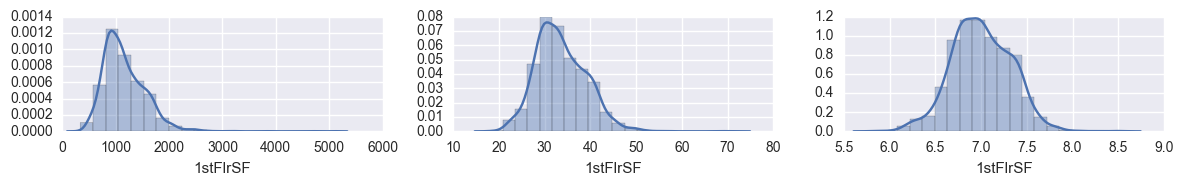

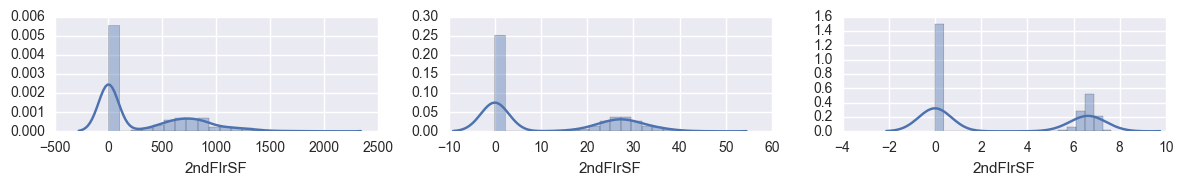

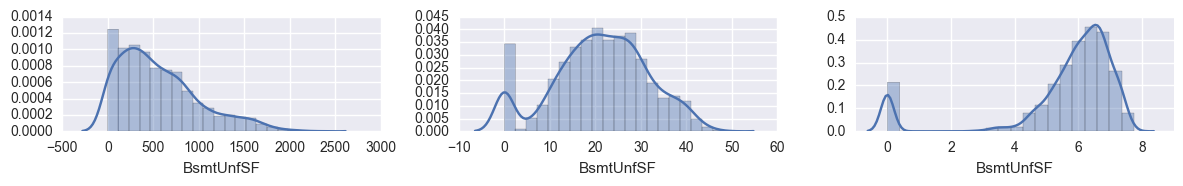

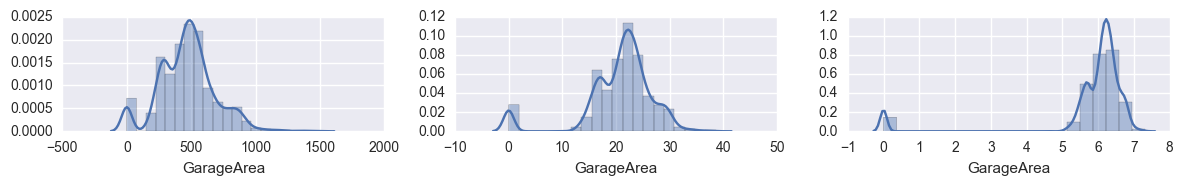

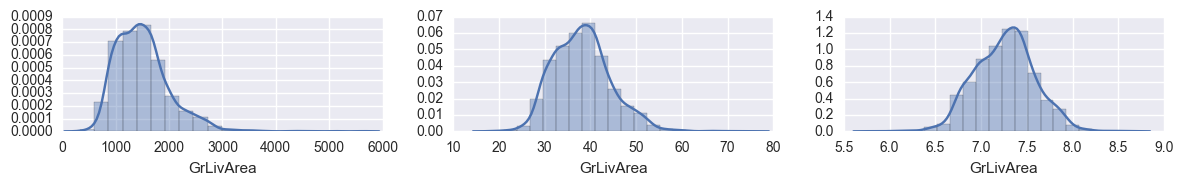

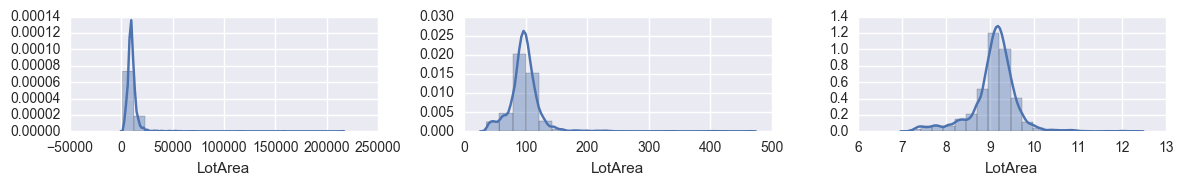

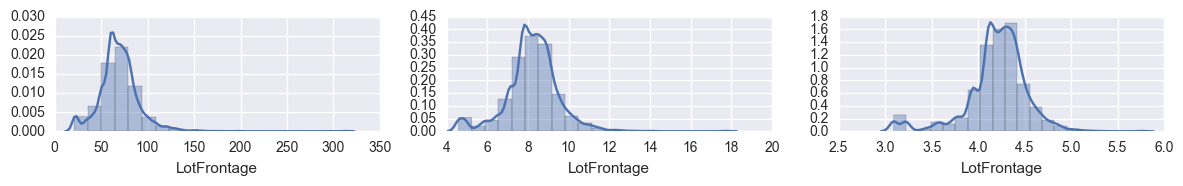

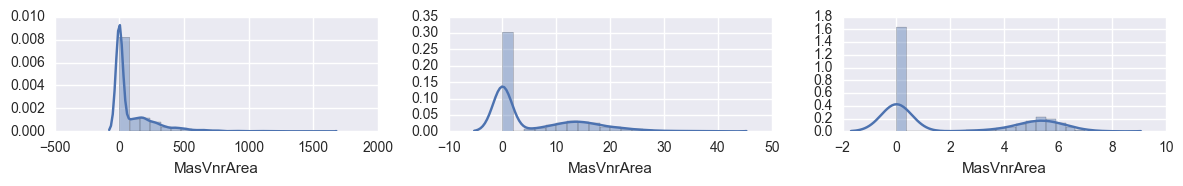

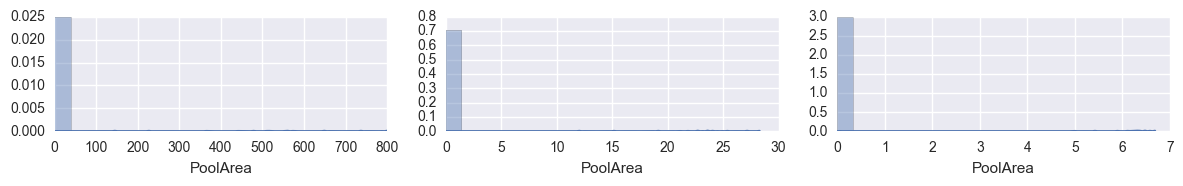

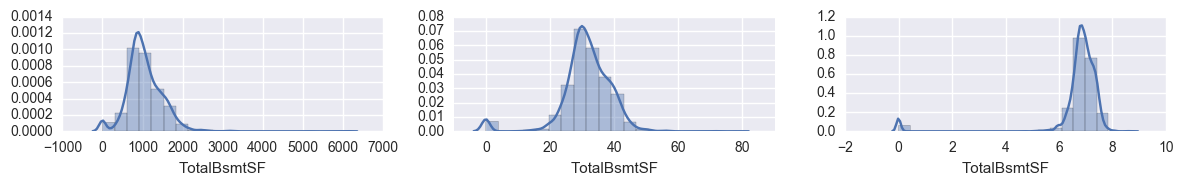

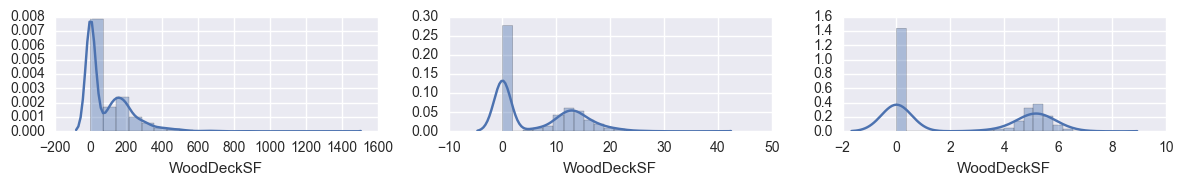

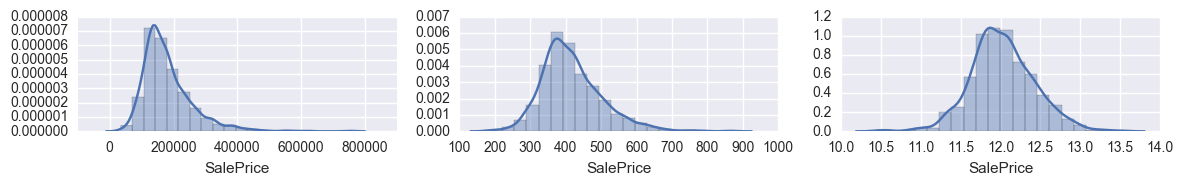

In [51]:
columns = [x for x in continuous_variables if x not in ignored_columns]

for x in columns:
    df_tmp = pd.concat([df[x], np.sqrt(df[x]), np.log1p(df[x])], axis=1)
    plot_features(df_tmp, plots=['dist'])

#### New feature: `TotalPorchSF`

/home/chvillap/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


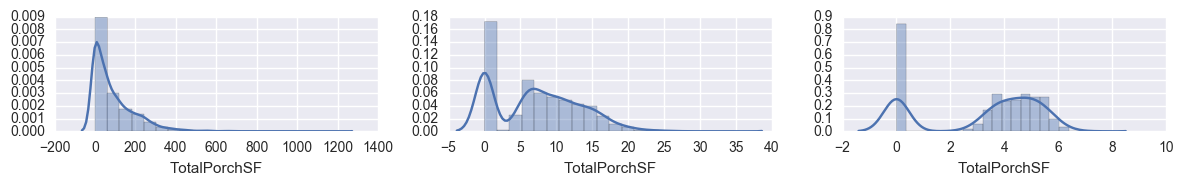

In [52]:
df['TotalPorchSF'] = df[['3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'ScreenPorch']].sum(axis=1)

df_tmp = pd.concat([df['TotalPorchSF'], np.sqrt(df['TotalPorchSF']), np.log1p(df['TotalPorchSF'])], axis=1)
plot_features(df_tmp, plots=['dist'])

#### Logarithm of skewed features

In [53]:
columns_log1p = [
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'LotArea',
    'LotFrontage',
    'MasVnrArea',
    'TotalBsmtSF',
    'WoodDeckSF',
    'SalePrice',
]

In [54]:
for x in columns_log1p:
    df[x + '__log1p'] = np.log1p(df[x])

/home/chvillap/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


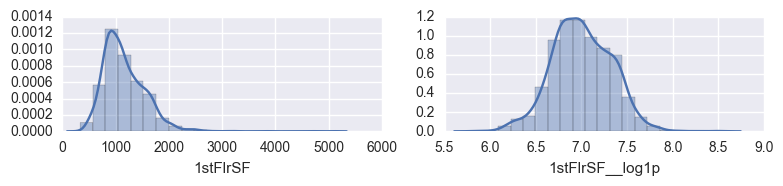

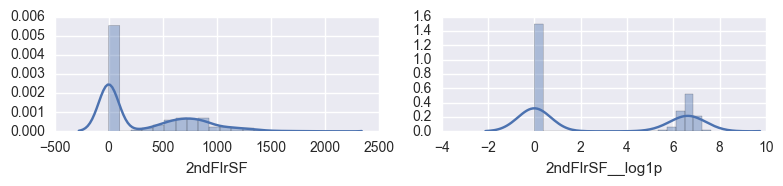

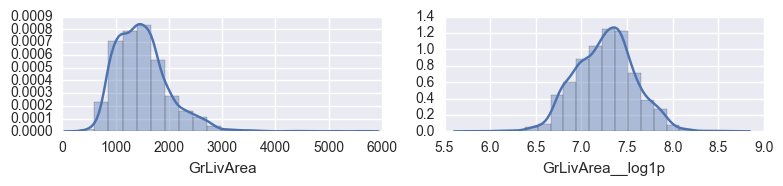

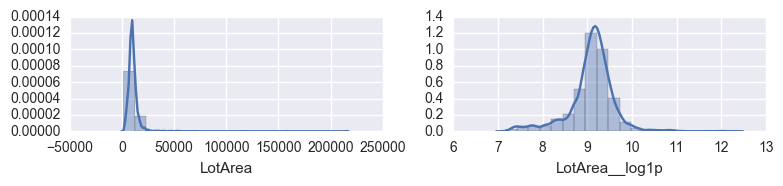

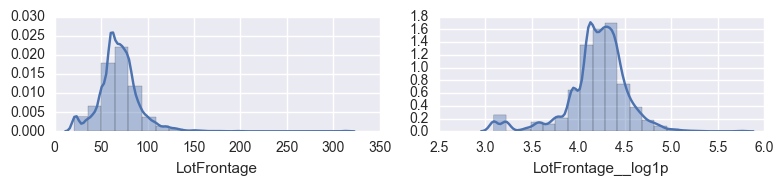

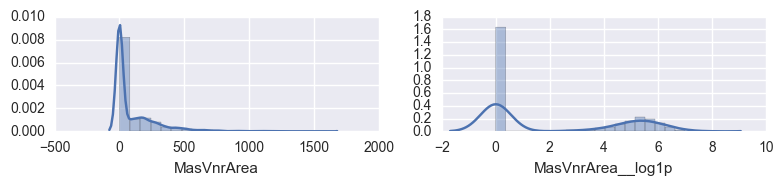

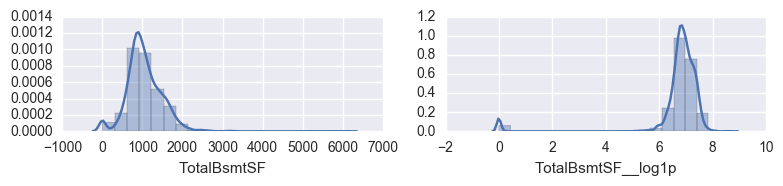

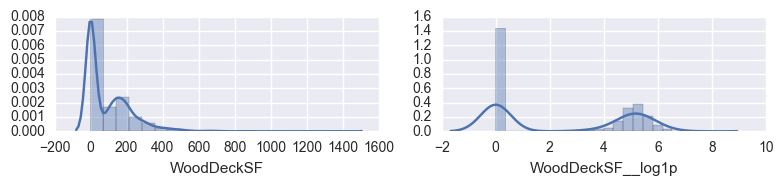

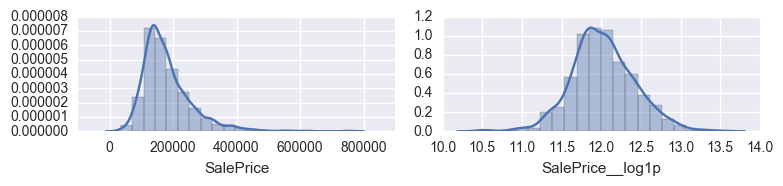

In [55]:
for x in columns_log1p:
    df_tmp = pd.concat([df[x], df[x + '__log1p']], axis=1)
    plot_features(df_tmp, plots=['dist'])

#### Square root of skewed features

In [56]:
columns_sqrt = [
    'BsmtUnfSF',
    'GarageArea',
]

In [57]:
for x in columns_sqrt:
    df[x + '__sqrt'] = np.sqrt(df[x])

/home/chvillap/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


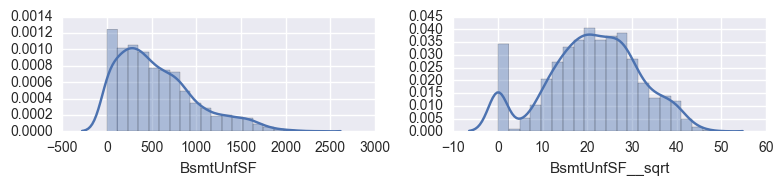

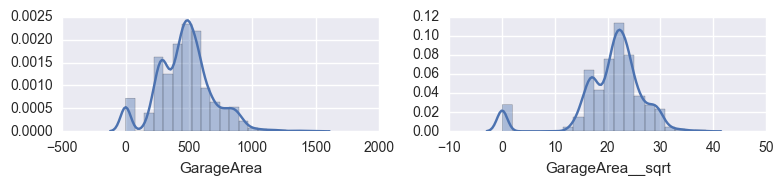

In [58]:
for x in columns_sqrt:
    df_tmp = pd.concat([df[x], df[x + '__sqrt']], axis=1)
    plot_features(df_tmp, plots=['dist'])

#### New feature: `HasBsmt`

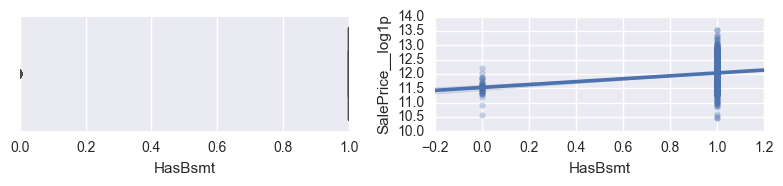

In [59]:
df['HasBsmt'] = df['BsmtCond'] != 'NA'

plot_features(df[['HasBsmt']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

In [60]:
columns_to_discard = [
    '3SsnPorch',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'EnclosedPorch',
    'LowQualFinSF',
    'MiscVal',
    'OpenPorchSF',
    'PoolArea',
    'ScreenPorch',
] + columns_log1p + columns_sqrt

Most distributions of features with continuous values were skewed, so I just applied some functions to make them look more like the Normal distribution. In addition, a totally new feature was created.

In [61]:
df_copy4 = df.copy()

### Discrete variables

In [62]:
ignored_columns = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'Fireplaces',
    'FullBath',
    'HalfBath',
]

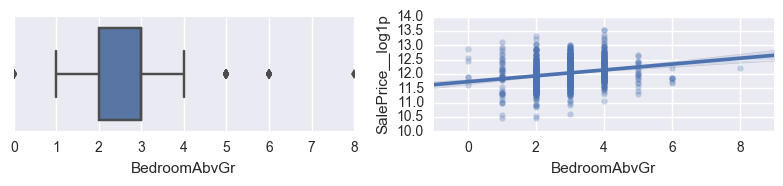

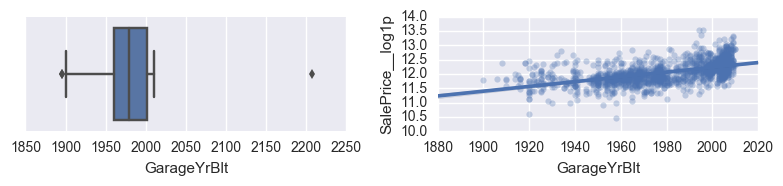

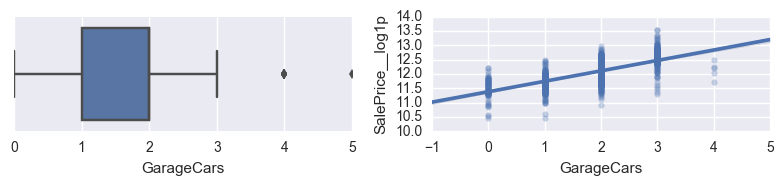

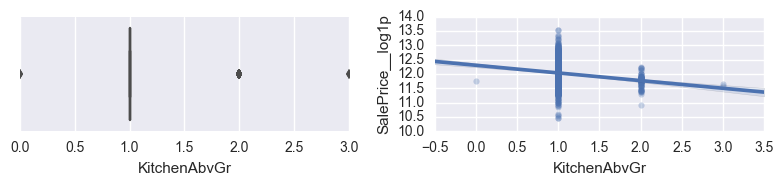

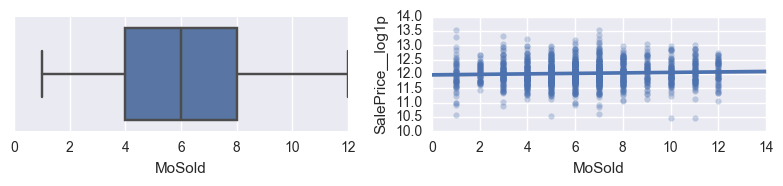

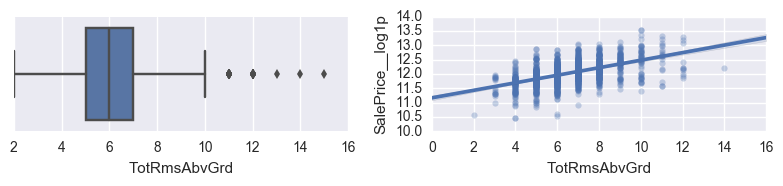

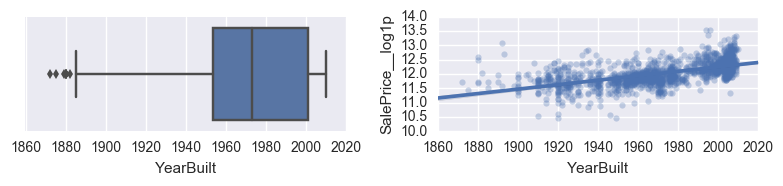

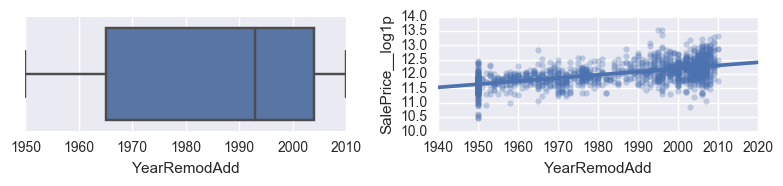

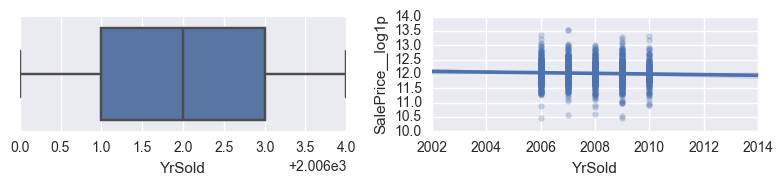

In [63]:
columns = [x for x in discrete_variables if x not in ignored_columns]

for x in columns:
    plot_features(df[[x]], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `GarageAge`

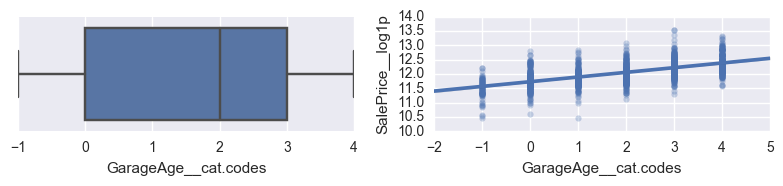

In [64]:
df['GarageAge'] = pd.qcut(df['GarageYrBlt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])
df['GarageAge'].cat.add_categories(['NA'], inplace=True)
df['GarageAge'].fillna('NA')

df_tmp = pd.DataFrame(df['GarageAge'].cat.codes, index=df.index, columns=['GarageAge__cat.codes'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `HasGarage`

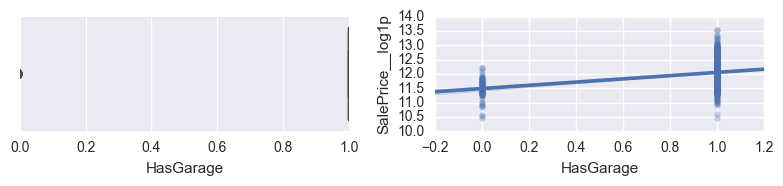

In [65]:
df['HasGarage'] = df['GarageCars'] > 0

plot_features(df[['HasGarage']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `HouseAge`

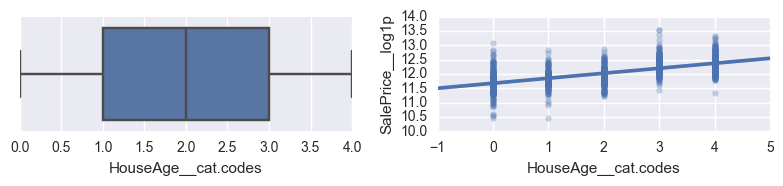

In [66]:
df['HouseAge'] = pd.qcut(df['YearBuilt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])

df_tmp = pd.DataFrame(df['HouseAge'].cat.codes, index=df.index, columns=['HouseAge__cat.codes'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `RemodAdd`

In [67]:
def set_RemodAdd(row):
    """Defines the categorical value of RemodAdd.
    
    Inputs:
        row  A single row of the data set.
    
    Outputs:
        The categorical string value.
    """
    years_since_remod = 2010 - row['YearRemodAdd']
    if row['GarageYrBlt'] == row['YearBuilt']:
        if  years_since_remod <= 10:
            return 'New'
        return 'Never'
    if years_since_remod <= 10:
        return 'Remod'
    return 'Never'

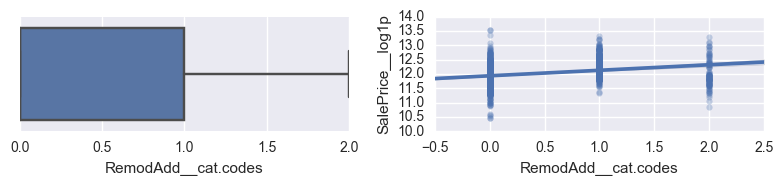

In [68]:
df['RemodAdd'] = df.apply(set_RemodAdd, axis=1).astype('category')

df_tmp = pd.DataFrame(df['RemodAdd'].cat.codes, index=df.index, columns=['RemodAdd__cat.codes'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `SeasonSold`

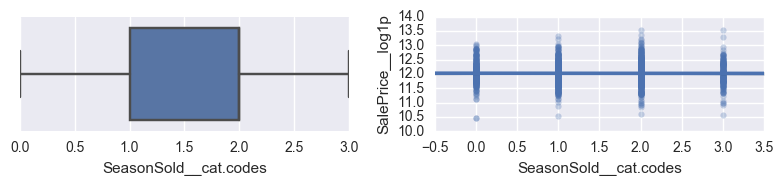

In [69]:
df['SeasonSold'] = df['MoSold'].map({1: 'Winter', 2: 'Winter', 12: 'Winter',
                                     3: 'Spring', 4: 'Spring', 5: 'Spring',
                                     6: 'Summer', 7: 'Summer', 8: 'Summer',
                                     9: 'Fall', 10: 'Fall', 11: 'Fall'})
df['SeasonSold'] = df['SeasonSold'].astype('category')

df_tmp = pd.DataFrame(df['SeasonSold'].cat.codes, index=df.index, columns=['SeasonSold__cat.codes'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `TotalBathrooms`

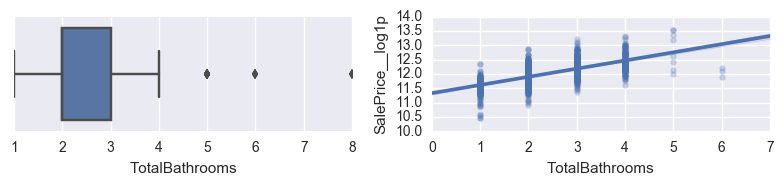

In [70]:
df['TotalBathrooms'] = df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)

plot_features(df[['TotalBathrooms']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

In [71]:
columns_to_discard += [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'Fireplaces',
    'GarageCars',
    'GarageYrBlt',
    'HalfBath',
    'MoSold',
    'YearBuilt',
    'YearRemodAdd',
]

The work here involved the creation of 6 new features. Months were grouped in seasons, we got a simple feature to tell whether a house has a garage or not, and so on.

In [72]:
df_copy5 = df.copy()

### Ordinal variables

#### As category: `BsmtCond`

In [73]:
df['BsmtCond'].value_counts()

TA    2609
Gd     122
Fa     104
NA      79
Po       5
Name: BsmtCond, dtype: int64

In [74]:
df['BsmtCond__cat'] = df['BsmtCond'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2, 'NA': -3})
df['BsmtCond__cat'] = df['BsmtCond__cat'].astype('category', ordered=True)

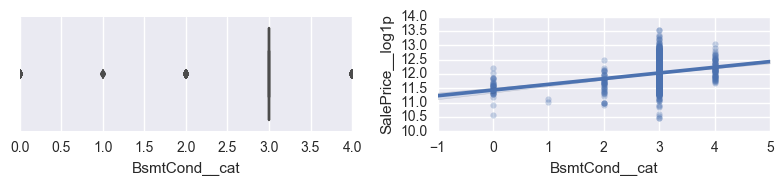

In [75]:
df_tmp = pd.DataFrame(df['BsmtCond__cat'].cat.codes, index=df.index, columns=['BsmtCond__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `BsmtExposure`

In [76]:
df['BsmtExposure'].value_counts()

No    1907
Av     418
Gd     276
Mn     239
NA      79
Name: BsmtExposure, dtype: int64

In [77]:
df['BsmtExposure__cat'] = df['BsmtExposure'].map({'Gd': 2, 'Av': 1, 'Mn': 0, 'No': -1, 'NA': -2})
df['BsmtExposure__cat'] = df['BsmtExposure__cat'].astype('category', ordered=True)

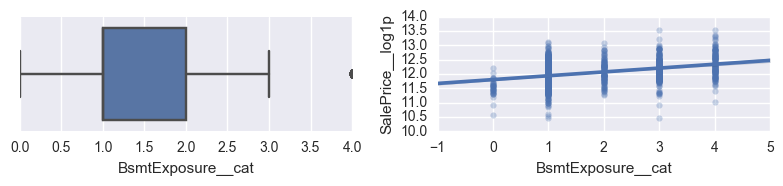

In [78]:
df_tmp = pd.DataFrame(df['BsmtExposure__cat'].cat.codes, index=df.index, columns=['BsmtExposure__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `BsmtQual`

In [79]:
df['BsmtQual'].value_counts()

TA    1285
Gd    1209
Ex     258
Fa      88
NA      79
Name: BsmtQual, dtype: int64

In [80]:
df['BsmtQual__cat'] = df['BsmtQual'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'NA': -2})
df['BsmtQual__cat'] = df['BsmtQual__cat'].astype('category', ordered=True)

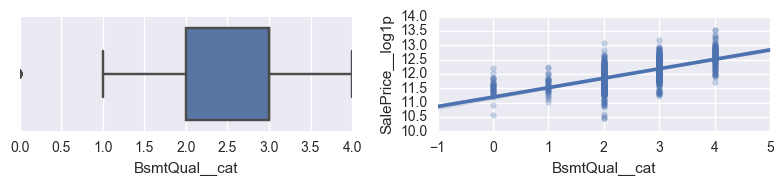

In [81]:
df_tmp = pd.DataFrame(df['BsmtQual__cat'].cat.codes, index=df.index, columns=['BsmtQual__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `ExterCond`

In [82]:
df['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [83]:
df['ExterCond__cat'] = df['ExterCond'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2})
df['ExterCond__cat'] = df['ExterCond__cat'].astype('category', ordered=True)

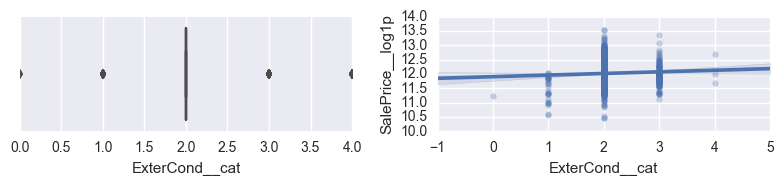

In [84]:
df_tmp = pd.DataFrame(df['ExterCond__cat'].cat.codes, index=df.index, columns=['ExterCond__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `ExterQual`

In [85]:
df['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [86]:
df['ExterQual__cat'] = df['ExterQual'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2})
df['ExterQual__cat'] = df['ExterQual__cat'].astype('category', ordered=True)

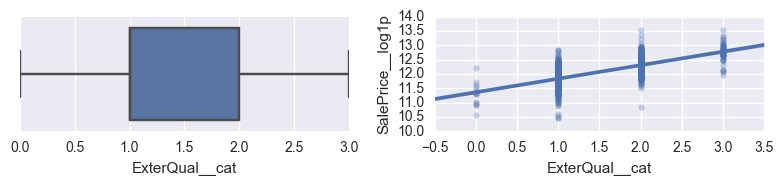

In [87]:
df_tmp = pd.DataFrame(df['ExterQual__cat'].cat.codes, index=df.index, columns=['ExterQual__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `GarageCond`

In [88]:
df['GarageCond'].value_counts()

TA    2656
NA     157
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [89]:
df['GarageCond__cat'] = df['GarageCond'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2, 'NA': -3})
df['GarageCond__cat'] = df['GarageCond__cat'].astype('category', ordered=True)

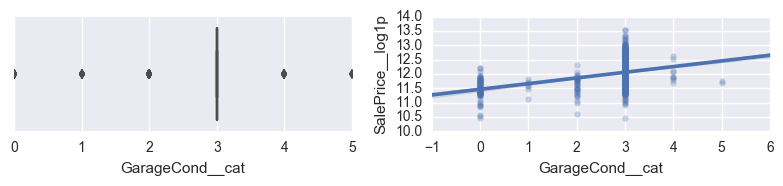

In [90]:
df_tmp = pd.DataFrame(df['GarageCond__cat'].cat.codes, index=df.index, columns=['GarageCond__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `GarageQual`

In [91]:
df['GarageQual'].value_counts()

TA    2606
NA     157
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [92]:
df['GarageQual__cat'] = df['GarageQual'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2, 'NA': -3})
df['GarageQual__cat'] = df['GarageQual__cat'].astype('category', ordered=True)

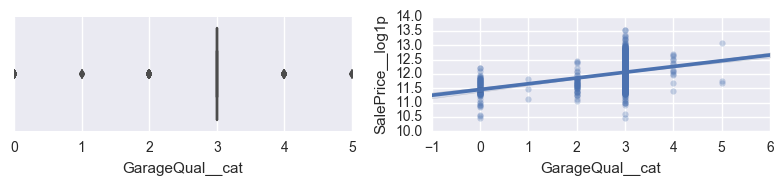

In [93]:
df_tmp = pd.DataFrame(df['GarageQual__cat'].cat.codes, index=df.index, columns=['GarageQual__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `GarageFinish`

In [94]:
df['GarageFinish'].value_counts()

Unf    1232
RFn     811
Fin     719
NA      157
Name: GarageFinish, dtype: int64

In [95]:
df['GarageFinish__cat'] = df['GarageFinish'].map({'Fin': 2, 'RFn': 1, 'Unf': -1, 'NA': -2})
df['GarageFinish__cat'] = df['GarageFinish__cat'].astype('category', ordered=True)

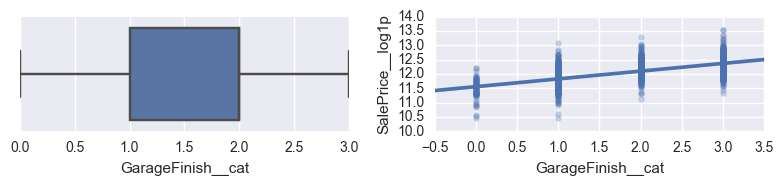

In [96]:
df_tmp = pd.DataFrame(df['GarageFinish__cat'].cat.codes, index=df.index, columns=['GarageFinish__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `HeatingQC`

In [97]:
df['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [98]:
df['HeatingQC__cat'] = df['HeatingQC'].map({'Ex': 2, 'Gd': 1, 'TA': -0, 'Fa': -1, 'Po': -2})
df['HeatingQC__cat'] = df['HeatingQC__cat'].astype('category', ordered=True)

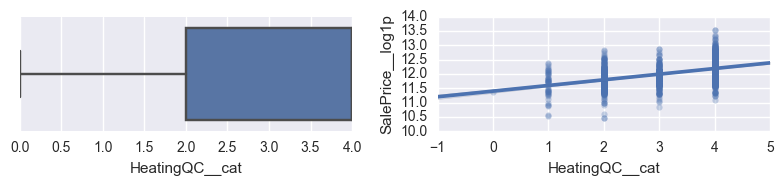

In [99]:
df_tmp = pd.DataFrame(df['HeatingQC__cat'].cat.codes, index=df.index, columns=['HeatingQC__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `KitchenQual`

In [100]:
df['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [101]:
df['KitchenQual__cat'] = df['KitchenQual'].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2})
df['KitchenQual__cat'] = df['KitchenQual__cat'].astype('category', ordered=True)

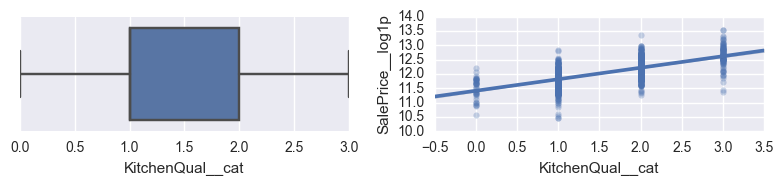

In [102]:
df_tmp = pd.DataFrame(df['KitchenQual__cat'].cat.codes, index=df.index, columns=['KitchenQual__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `LotShape`

In [103]:
df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [104]:
df['LotShape__cat'] = df['LotShape'].map({'Reg': 0, 'IR1': -1, 'IR2': -2, 'IR3': -3})
df['LotShape__cat'] = df['LotShape__cat'].astype('category', ordered=True)

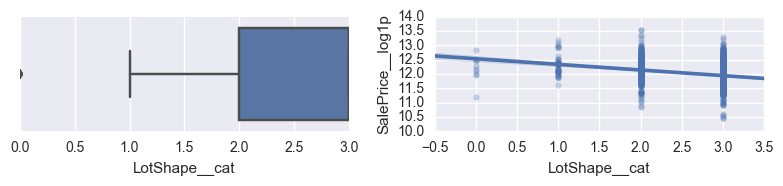

In [105]:
df_tmp = pd.DataFrame(df['LotShape__cat'].cat.codes, index=df.index, columns=['LotShape__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### As category: `PavedDrive`

In [106]:
df['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [107]:
df['PavedDrive__cat'] = df['PavedDrive'].map({'Y': 1, 'P': 0, 'N': -1})
df['PavedDrive__cat'] = df['PavedDrive__cat'].astype('category', ordered=True)

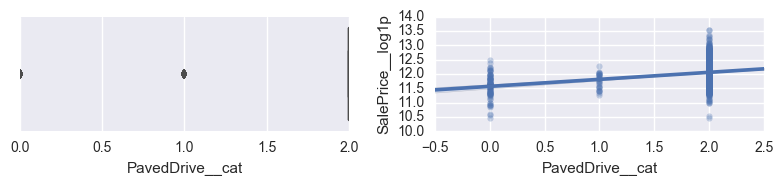

In [108]:
df_tmp = pd.DataFrame(df['PavedDrive__cat'].cat.codes, index=df.index, columns=['PavedDrive__cat'])
plot_features(df_tmp, df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `BsmtMeanRating`

In [109]:
df['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NA      79
Name: BsmtFinType1, dtype: int64

In [110]:
df['BsmtFinType2'].value_counts()

Unf    2494
Rec     105
LwQ      87
NA       79
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

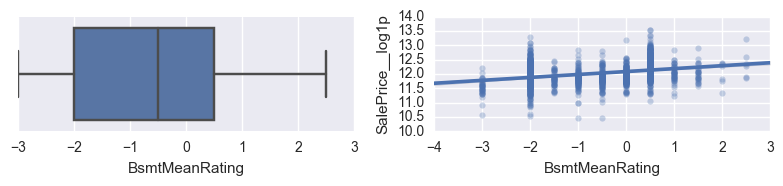

In [111]:
mapping = {'GLQ': 3, 'ALQ': 2, 'BLQ': 1, 'Rec': 0, 'LwQ': -1, 'Unf': -2, 'NA': -3}
df['BsmtMeanRating'] = (df['BsmtFinType1'].map(mapping) + df['BsmtFinType2'].map(mapping)) / 2

plot_features(df[['BsmtMeanRating']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `StdElectrical`

In [112]:
df['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

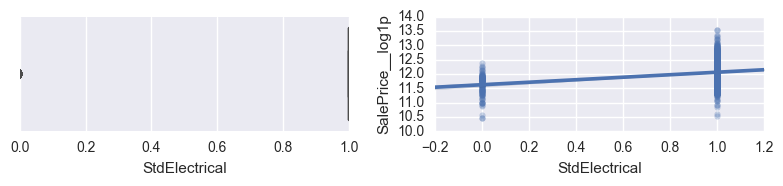

In [113]:
df['StdElectrical'] = df['Electrical'] == 'SBrkr'

plot_features(df[['StdElectrical']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `TypicalFunc`

In [114]:
df['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

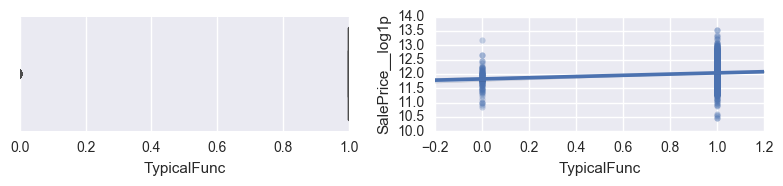

In [115]:
df['TypicalFunc'] = df['Functional'] == 'Typ'

plot_features(df[['TypicalFunc']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `HasFence`

In [116]:
df['Fence'].value_counts()

NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

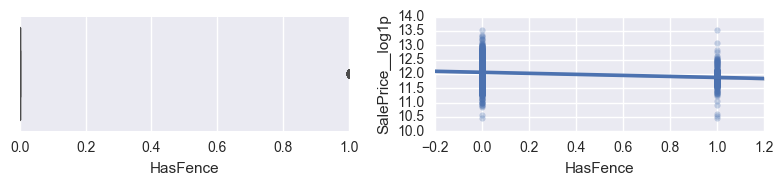

In [117]:
df['HasFence'] = df['Fence'] != 'NA'

plot_features(df[['HasFence']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: `FireplacesQu`

In [118]:
df['FireplaceQu'].value_counts()

NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

In [119]:
df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

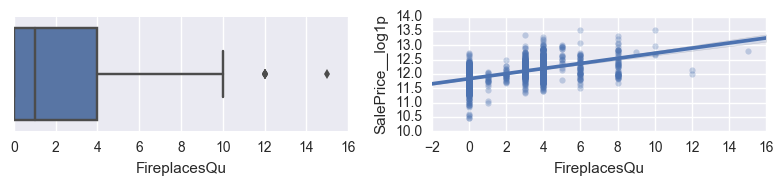

In [120]:
df['FireplacesQu'] = df['Fireplaces'] * df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

plot_features(df[['FireplacesQu']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

#### New feature: HasSlope

In [121]:
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

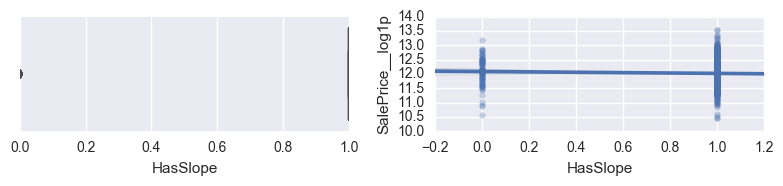

In [122]:
df['HasSlope'] = df['LandSlope'] == 'Gtl'

plot_features(df[['HasSlope']], df['SalePrice__log1p'], plots=['box', 'reg'], graph_axis=1)

In [123]:
columns_to_discard += [
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtQual',
    'Electrical',
    'ExterCond',
    'ExterQual',
    'Fence',
    'FireplaceQu',
    'Functional',
    'GarageCond',
    'GarageFinish',
    'GarageQual',
    'HeatingQC',
    'KitchenQual',
    'LandSlope',
    'LotShape',
    'PavedDrive',
    'PoolQC',    
    'Utilities',
]

Several ordinal features were categorized, and in this process their values were mapped in a way that correctly expresses the implicit ordering that they have. Moreover, 6 new features were created to simplify the information provided by the other ordinal features.

In [124]:
df_copy6 = df.copy()

### Nominal variables

In [125]:
ignored_columns = []

/home/chvillap/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/chvillap/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


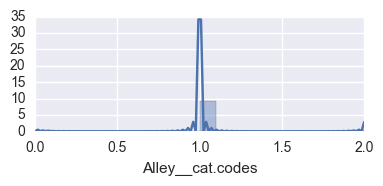

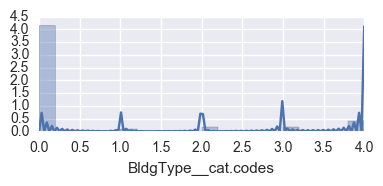

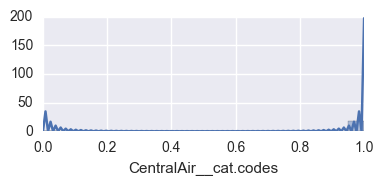

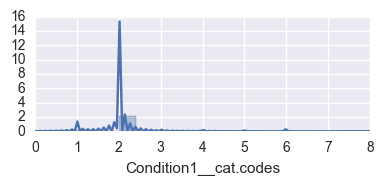

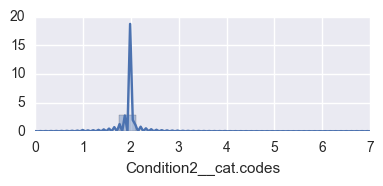

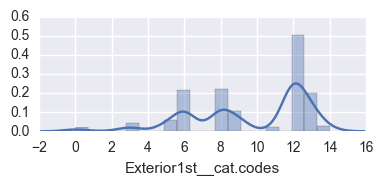

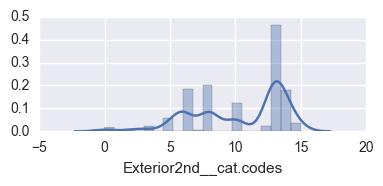

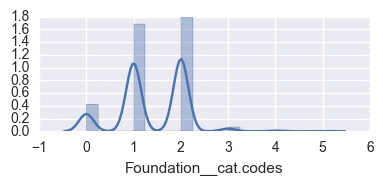

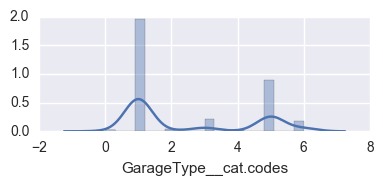

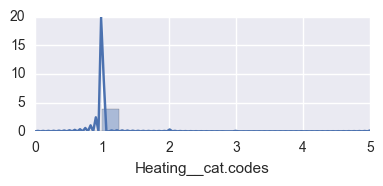

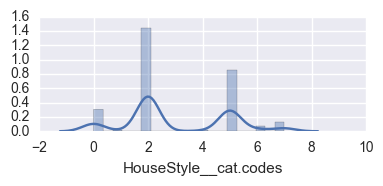

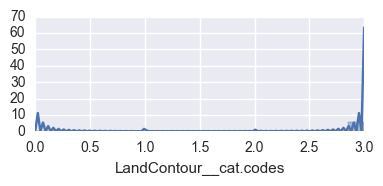

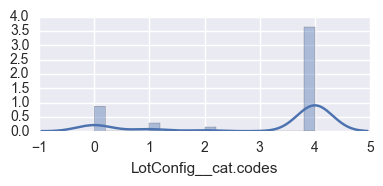

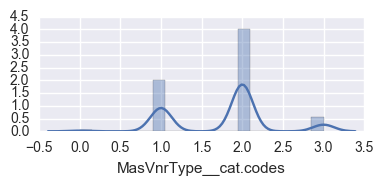

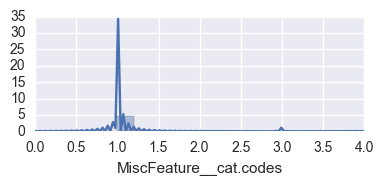

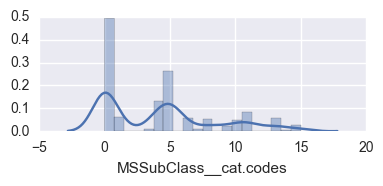

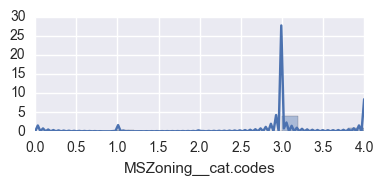

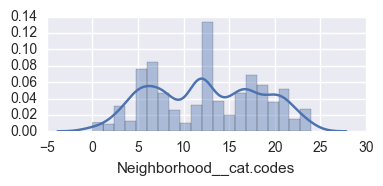

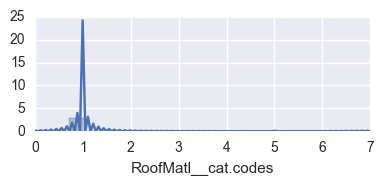

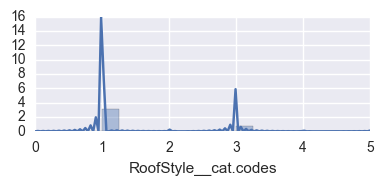

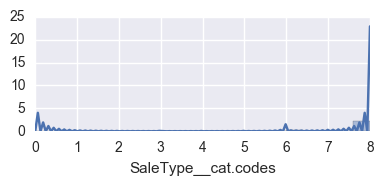

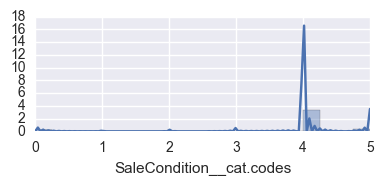

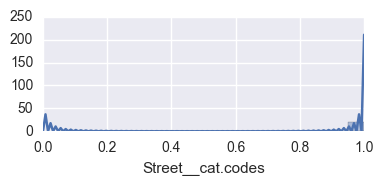

In [126]:
columns = [x for x in nominal_variables if x not in ignored_columns]

for x in columns:
    df_tmp = pd.DataFrame(df[x].astype('category').cat.codes, index=df.index, columns=[x + '__cat.codes'])
    plot_features(df_tmp, plots=['dist'])

#### As category: `Exterior1st`

In [127]:
df['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [128]:
df['Exterior1st__cat'] = df['Exterior1st'].replace(['AsbShng', 'Stucco', 'BrkComm', 'Stone', 'CBlock', 'AsphShn', 'ImStucc'], 'Other')
df['Exterior1st__cat'] = df['Exterior1st__cat'].astype('category')

#### As category: `Exterior2nd`

In [129]:
df['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [130]:
df['Exterior2nd__cat'] = df['Exterior2nd'].replace('Brk Cmn', 'BrkComm')
df['Exterior2nd__cat'] = df['Exterior2nd__cat'].replace(['Stucco', 'BrkFace', 'AsbShng', 'BrkComm', 'Stone', 'CBlock', 'AsphShn' 'ImStucc'], 'Other')
df['Exterior2nd__cat'] = df['Exterior2nd__cat'].astype('category')

#### As category: `Foundation`

In [131]:
df['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [132]:
df['Foundation__cat'] = df['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other').astype('category')

#### As category: `GarageType`

In [133]:
df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [134]:
df['GarageType__cat'] = df['GarageType'].replace(['Basment', '2Types', 'CarPort'], 'Other')
df['GarageType__cat'] = df['GarageType__cat'].fillna('NA').astype('category')

#### As category: `HouseStyle`

In [135]:
df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [136]:
df['HouseStyle__cat'] = df['HouseStyle'].replace(['2.5Unf', '1.5Unf', '2.5Fin'], 'Other')
df['HouseStyle__cat'] = df['HouseStyle__cat'].astype('category')

#### As category: `LotConfig`

In [137]:
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [138]:
df['LotConfig__cat'] = df['LotConfig'].replace('FR3', 'FR2').astype('category')

#### As category: `MasVnrType`

In [139]:
df['MasVnrType'].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [140]:
df['MasVnrType__cat'] = df['MasVnrType'].astype('category')

#### As category: `MSSubClass`

In [141]:
df['MSSubClass'].value_counts()

020    1079
060     575
050     287
120     182
030     139
160     128
070     128
080     118
090     109
190      61
085      48
075      23
045      18
180      17
040       6
150       1
Name: MSSubClass, dtype: int64

In [142]:
df['MSSubClass__cat'] = df['MSSubClass'].replace(['085', '075', '045', '180', '040', '150'], 'Other').astype('category')

#### As category: `MSZoning`

In [143]:
df['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [144]:
df['MSZoning__cat'] = df['MSZoning'].replace(['RH', 'C (all)'], 'Other').astype('category')

#### As category: `Neighborhood`

In [145]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [146]:
neighborhood_value_counts = df['Neighborhood'].value_counts()
to_replace = (neighborhood_value_counts[neighborhood_value_counts < 50]).index.tolist()

df['Neighborhood__cat'] = df['Neighborhood'].replace(to_replace, 'Other').astype('category')

#### As category: `RoofStyle`

In [147]:
df['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [148]:
df['RoofStyle__cat'] = df['RoofStyle'].replace(['Gambrel', 'Flat', 'Mansard', 'Shed'], 'Other')
df['RoofStyle__cat'] = df['RoofStyle__cat'].astype('category')

#### As category: `SaleType`

In [149]:
df['SaleType'].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [150]:
df['SaleType__cat'] = df['SaleType'].replace(['ConLD', 'CWD', 'ConLI', 'ConLw', 'Oth', 'Con'], 'Other')
df['SaleType__cat'] = df['SaleType__cat'].astype('category')

#### As category: `SaleCondition`

In [151]:
df['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [152]:
df['SaleCondition__cat'] = df['SaleCondition'].replace(['Family', 'Alloca', 'AdjLand'], 'Other')
df['SaleCondition__cat'] = df['SaleCondition__cat'].astype('category')

In [153]:
columns_to_discard += nominal_variables

Here all nominal features were categorized. For the sake of simplicity, rare values were grouped together into a single category.

In [154]:
df.drop(columns_to_discard, axis=1, inplace=True)

In [155]:
df_copy7 = df.copy()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 56 columns):
BedroomAbvGr          2919 non-null int64
KitchenAbvGr          2919 non-null int64
OverallCond           2919 non-null int64
OverallQual           2919 non-null int64
TotRmsAbvGrd          2919 non-null int64
YrSold                2919 non-null int64
TotalPorchSF          2919 non-null float64
1stFlrSF__log1p       2919 non-null float64
2ndFlrSF__log1p       2919 non-null float64
GrLivArea__log1p      2919 non-null float64
LotArea__log1p        2919 non-null float64
LotFrontage__log1p    2919 non-null float64
MasVnrArea__log1p     2919 non-null float64
TotalBsmtSF__log1p    2919 non-null float64
WoodDeckSF__log1p     2919 non-null float64
SalePrice__log1p      1460 non-null float64
BsmtUnfSF__sqrt       2919 non-null float64
GarageArea__sqrt      2919 non-null float64
HasBsmt               2919 non-null bool
GarageAge             2760 non-null category
HasGarage             2919 

At the end, the data set contained a lot of columns that were not needed anymore. So we discarded them.

In [157]:
df_copy8 = df.copy()

### Feature encoding

In [158]:
new_ordinal_variables = [
    'GarageAge',
    'HouseAge',
    'RemodAdd',
    'BsmtCond__cat',
    'BsmtExposure__cat',
    'BsmtQual__cat',
    'ExterCond__cat',
    'ExterQual__cat',
    'GarageCond__cat',
    'GarageQual__cat',
    'GarageFinish__cat',
    'HeatingQC__cat',
    'KitchenQual__cat',
    'LotShape__cat',
    'PavedDrive__cat',
]

In [159]:
new_bool_variables = [
    'HasBsmt',
    'HasGarage',
    'StdElectrical',
    'TypicalFunc',
    'HasFence',
    'HasSlope',
]

In [160]:
new_nominal_variables = [
    'SeasonSold',
    'Exterior1st__cat',
    'Exterior2nd__cat',
    'Foundation__cat',
    'GarageType__cat',
    'HouseStyle__cat',
    'LotConfig__cat',
    'MSZoning__cat',
    'Neighborhood__cat',
    'RoofStyle__cat',
    'SaleType__cat',
    'SaleCondition__cat',
    'MasVnrType__cat',
    'MSSubClass__cat',
]

In [161]:
df[new_ordinal_variables] = df[new_ordinal_variables].apply(lambda x: x.cat.codes, axis=0)

In [162]:
df[new_ordinal_variables].head()

,GarageAge,HouseAge,RemodAdd,BsmtCond__cat,BsmtExposure__cat,BsmtQual__cat,ExterCond__cat,ExterQual__cat,GarageCond__cat,GarageQual__cat,GarageFinish__cat,HeatingQC__cat,KitchenQual__cat,LotShape__cat,PavedDrive__cat
Id,,,,,,,,,,,,,,,
1,3,3,1,3,1,3,2,2,3,3,2,4,2,3,2
2,2,2,0,3,4,3,2,1,3,3,2,4,1,3,2
3,3,3,1,3,2,3,2,2,3,3,2,4,2,2,2
4,3,0,0,4,1,2,2,1,3,3,1,3,2,2,2
5,3,3,1,3,3,3,2,2,3,3,2,4,2,2,2


In [163]:
df[new_bool_variables] = df[new_bool_variables].apply(lambda x: x.map({False: -1, True: 1}), axis=1)

In [164]:
df[new_bool_variables].head()

,HasBsmt,HasGarage,StdElectrical,TypicalFunc,HasFence,HasSlope
Id,,,,,,
1,1,1,1,1,-1,1
2,1,1,1,1,-1,1
3,1,1,1,1,-1,1
4,1,1,1,1,-1,1
5,1,1,1,1,-1,1


In [165]:
df = pd.get_dummies(df)

In [166]:
df.head()

,BedroomAbvGr,KitchenAbvGr,OverallCond,OverallQual,TotRmsAbvGrd,YrSold,TotalPorchSF,1stFlrSF__log1p,2ndFlrSF__log1p,GrLivArea__log1p,...,RoofStyle__cat_Hip,RoofStyle__cat_Other,SaleType__cat_COD,SaleType__cat_New,SaleType__cat_Other,SaleType__cat_WD,SaleCondition__cat_Abnorml,SaleCondition__cat_Normal,SaleCondition__cat_Other,SaleCondition__cat_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,7,8,2008,61.0,6.753438,6.751101,7.444833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,8,6,6,2007,0.0,7.141245,0.000000,7.141245,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,1,5,7,6,2008,42.0,6.825460,6.765039,7.488294,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3,1,5,7,7,2006,307.0,6.869014,6.629363,7.448916,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,4,1,5,8,9,2008,84.0,7.044033,6.960348,7.695758,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 132 entries, BedroomAbvGr to SaleCondition__cat_Partial
dtypes: float64(104), int64(13), int8(15)
memory usage: 2.7 MB


I'm going to use Scikit-learn to create the predictive model, but Scikit-lean can only handle numbers, so all categorical features needed to be encoded once more. Ordinal variables could be easily encoded by just replacing their category values by their respective category codes (which I had defineded by hand). Boolean values were mapped to `{-1, +1}`. And for the nominal variables I used one-hot encoding (1 feature with N values is transformed to N mutually exclusive binary features, one for each nominal value of each feature).

In [168]:
df_copy9 = df.copy()

## Feature scaling

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
for x in df.columns:
    if x != 'SalePrice__log1p':
        df[x] = StandardScaler().fit_transform(df[[x]])

In [171]:
df.drop('SalePrice__log1p', axis=1).describe()

,BedroomAbvGr,KitchenAbvGr,OverallCond,OverallQual,TotRmsAbvGrd,YrSold,TotalPorchSF,1stFlrSF__log1p,2ndFlrSF__log1p,GrLivArea__log1p,...,RoofStyle__cat_Hip,RoofStyle__cat_Other,SaleType__cat_COD,SaleType__cat_New,SaleType__cat_Other,SaleType__cat_WD,SaleCondition__cat_Abnorml,SaleCondition__cat_Normal,SaleCondition__cat_Other,SaleCondition__cat_Partial
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,...,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03
mean,2.534610e-16,-4.876956e-16,3.222651e-16,-1.592879e-16,2.442377e-16,6.494280e-14,3.042927e-17,1.797052e-15,-5.050963e-17,-2.290223e-15,...,-1.475733e-17,-1.780008e-17,1.688726e-17,-3.057963e-17,1.532785e-17,1.435417e-16,-1.747679e-17,5.454128e-17,2.947663e-18,-2.981894e-17
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,...,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-3.477258e+00,-4.871328e+00,-4.101368e+00,-3.610024e+00,-2.836974e+00,-1.363569e+00,-8.272726e-01,-3.689017e+00,-8.636097e-01,-4.457648e+00,...,-4.823752e-01,-1.423820e-01,-1.752722e-01,-2.986287e-01,-1.532719e-01,-2.535248e+00,-2.638609e-01,-2.155466e+00,-1.700111e-01,-3.026930e-01
25%,-1.045801e+00,-2.076985e-01,-5.072842e-01,-7.725525e-01,-9.250621e-01,-6.029616e-01,-8.272726e-01,-7.057756e-01,-8.636097e-01,-7.212568e-01,...,-4.823752e-01,-1.423820e-01,-1.752722e-01,-2.986287e-01,-1.532719e-01,3.944388e-01,-2.638609e-01,4.639367e-01,-1.700111e-01,-3.026930e-01
50%,1.699271e-01,-2.076985e-01,-5.072842e-01,-6.318454e-02,-2.877583e-01,1.576455e-01,-3.638132e-01,-5.175510e-02,-8.636097e-01,4.423336e-02,...,-4.823752e-01,-1.423820e-01,-1.752722e-01,-2.986287e-01,-1.532719e-01,3.944388e-01,-2.638609e-01,4.639367e-01,-1.700111e-01,-3.026930e-01
75%,1.699271e-01,-2.076985e-01,3.912368e-01,6.461834e-01,3.495455e-01,9.182526e-01,4.333369e-01,7.185283e-01,1.138000e+00,6.243445e-01,...,-4.823752e-01,-1.423820e-01,-1.752722e-01,-2.986287e-01,-1.532719e-01,3.944388e-01,-2.638609e-01,4.639367e-01,-1.700111e-01,-3.026930e-01
max,6.248569e+00,9.119561e+00,3.086800e+00,2.774287e+00,5.447976e+00,1.678860e+00,1.036064e+01,4.749077e+00,1.466150e+00,4.239896e+00,...,2.073075e+00,7.023360e+00,5.705412e+00,3.348640e+00,6.524352e+00,3.944388e-01,3.789876e+00,4.639367e-01,5.881969e+00,3.303678e+00


Several learning algorithms can take benefit from scaled data (all features in the same scale), in terms of robustness, convergence, and so on. Thus, by subtracting each feature vector by its mean and dividing it by its standard deviation, all features were scaled (including nominal and ordinal ones, since now they are encoded as numbers).

In [172]:
df_copy10 = df.copy()

## Saving the results

In [173]:
sorted_columns = sorted(df.columns)
sorted_columns.remove('SalePrice__log1p')
sorted_columns.append('SalePrice__log1p')
df = df.reindex_axis(sorted_columns, axis=1)

In [174]:
df_train = df.loc[df['SalePrice__log1p'].notnull(), :]
df_test = df.loc[df['SalePrice__log1p'].isnull(), :].drop('SalePrice__log1p', axis=1)

df_train.shape, df_test.shape

((1460, 132), (1459, 131))

In [175]:
df_train.to_csv('train_preprocessed.csv')
df_test.to_csv('test_preprocessed.csv')

Finally, the training and test set samples were separated again and saved as new CSV files. Now our data sets seem to be in good shape to be processed by some learning algorithms.